In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(open("Descriptive-statistics-HomePrice.xlsx", "rb"), "Data")
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold
1,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold
2,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold
3,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold
4,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold


In [6]:
df.describe()

,ID,Building,Year of sale,Month of sale,Property #,Area (ft.),Price
count,267.000000,267.000000,195.000000,195.000000,267.000000,267.000000,267.000000
mean,2975.142322,2.947566,2006.333333,7.271795,27.580524,936.221113,281171.901501
std,1392.197474,1.391794,1.072941,3.378674,15.361437,284.895016,89119.120849
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.709200,117564.071600
25%,2015.500000,2.000000,2006.000000,4.000000,14.500000,756.212800,217553.056400
50%,3024.000000,3.000000,2007.000000,8.000000,28.000000,798.284400,249075.656800
75%,4031.500000,4.000000,2007.000000,10.000000,40.000000,1121.945200,326964.852200
max,5052.000000,5.000000,2010.000000,12.000000,59.000000,1942.502800,538271.735600


In [7]:
df.dtypes

ID                    int64
Building              int64
Year of sale        float64
Month of sale       float64
Type of property     object
Property #            int64
Area (ft.)          float64
Price               float64
Status               object
dtype: object

In [8]:
df= df.astype({'Status': 'category'})
df.dtypes

ID                     int64
Building               int64
Year of sale         float64
Month of sale        float64
Type of property      object
Property #             int64
Area (ft.)           float64
Price                float64
Status              category
dtype: object

<ipython-input-9-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Building'}>,
        <AxesSubplot:title={'center':'Year of sale'}>],
       [<AxesSubplot:title={'center':'Month of sale'}>,
        <AxesSubplot:title={'center':'Property #'}>,
        <AxesSubplot:title={'center':'Area (ft.)'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

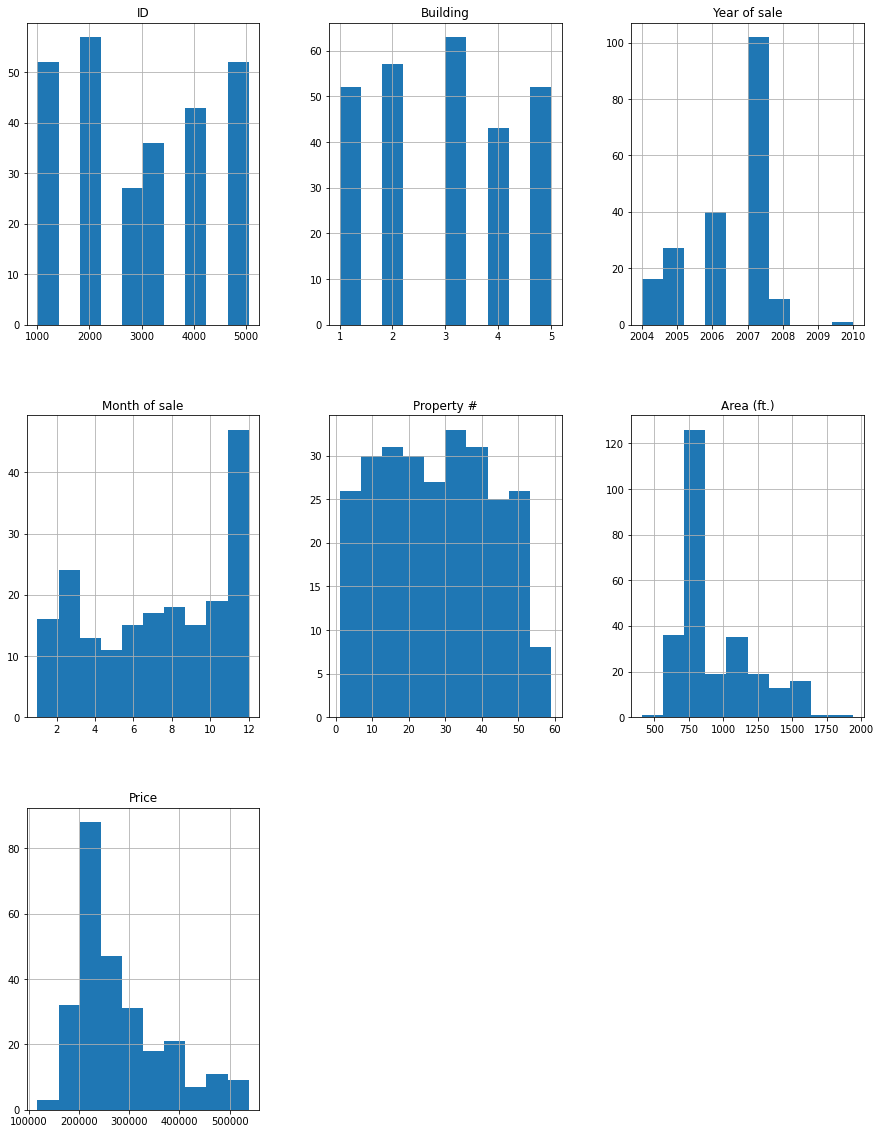

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<AxesSubplot:>

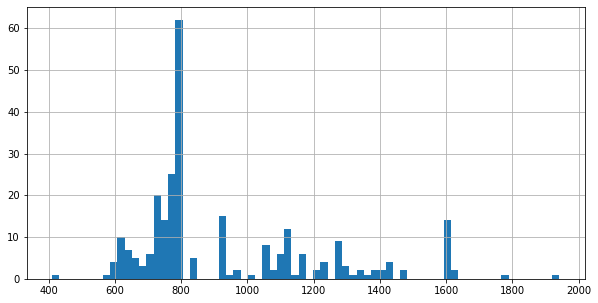

In [11]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df["Area (ft.)"].hist(ax=ax, bins=70)

<AxesSubplot:>

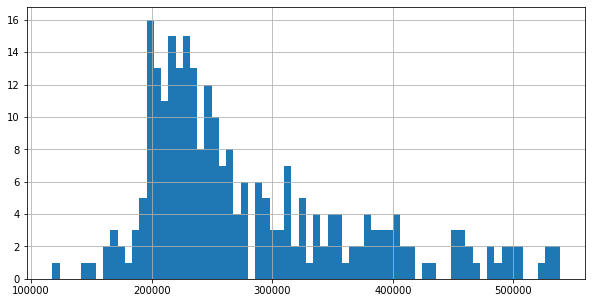

In [12]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df["Price"].hist(ax=ax, bins=70)

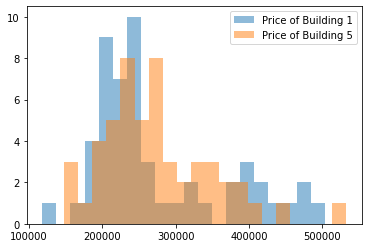

In [15]:
x = df[df["Building"]== 1]["Price"]
y = df[df["Building"]== 5]["Price"]

bins = 20

plt.hist(x, bins=bins, alpha=0.5, label='Price of Building 1')
plt.hist(y, bins=bins, alpha=0.5, label='Price of Building 5')
plt.legend(loc='upper right')
plt.show()

In [16]:
df["Status"].unique()

['Sold', NaN]
Categories (1, object): ['Sold']

In [22]:
x = df[df["Status"]== "Sold"]["Price"]
print(x.shape)
y = df[df["Status"].isnull()]["Price"]
print(y.shape)

(195,)
(72,)


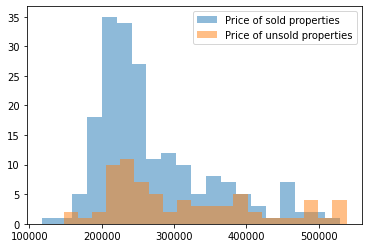

In [23]:
x = df[df["Status"]== "Sold"]["Price"]
y = df[df["Status"].isnull()]["Price"]

bins = 20

plt.hist(x, bins=bins, alpha=0.5, label='Price of sold properties')
plt.hist(y, bins=bins, alpha=0.5, label='Price of unsold properties')
plt.legend(loc='upper right')
plt.show()

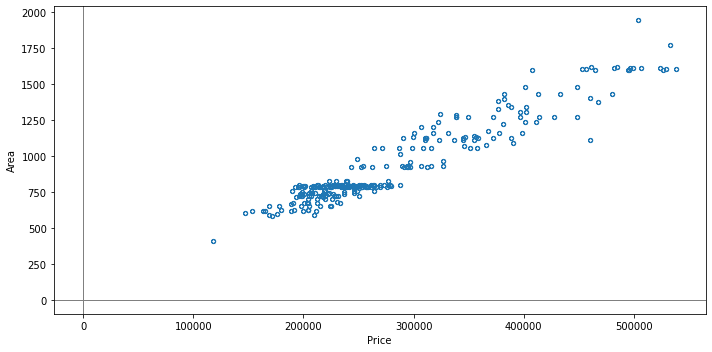

In [25]:
ax = df.plot.scatter(x='Price', y='Area (ft.)', figsize=(10, 5), marker='$\u25EF$')
ax.set_xlabel('Price')
ax.set_ylabel('Area')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

In [26]:
df.corr(method="pearson")

,ID,Building,Year of sale,Month of sale,Property #,Area (ft.),Price
ID,1.000000,0.999939,0.728397,0.166359,0.031451,0.001286,0.003574
Building,0.999939,1.000000,0.727657,0.166992,0.020420,-0.001998,0.000487
Year of sale,0.728397,0.727657,1.000000,-0.111858,0.119424,-0.020719,-0.012964
Month of sale,0.166359,0.166992,-0.111858,1.000000,-0.039440,-0.041617,-0.031861
Property #,0.031451,0.020420,0.119424,-0.039440,1.000000,0.297503,0.279711
Area (ft.),0.001286,-0.001998,-0.020719,-0.041617,0.297503,1.000000,0.951087
Price,0.003574,0.000487,-0.012964,-0.031861,0.279711,0.951087,1.000000


In [27]:
df.cov()

,ID,Building,Year of sale,Month of sale,Property #,Area (ft.),Price
ID,1.938214e+06,1937.533806,972.702749,699.564129,672.608797,5.102033e+02,4.434169e+05
Building,1.937534e+03,1.937090,0.970790,0.701560,0.436569,-7.922963e-01,6.042914e+01
Year of sale,9.727027e+02,0.970790,1.151203,-0.405498,1.900344,-5.813048e+00,-1.114573e+03
Month of sale,6.995641e+02,0.701560,-0.405498,11.415437,-1.976262,-3.676783e+01,-8.625728e+03
Property #,6.726088e+02,0.436569,1.900344,-1.976262,235.973755,1.301991e+03,3.829237e+05
Area (ft.),5.102033e+02,-0.792296,-5.813048,-36.767828,1301.991127,8.116517e+04,2.414772e+07
Price,4.434169e+05,60.429144,-1114.573438,-8625.728343,382923.718949,2.414772e+07,7.942218e+09


In [29]:
count_type= df["Type of property"].value_counts()
count_year= df["Year of sale"].value_counts()

print(count_year)
print(count_type)

2007.0    102
2006.0     40
2005.0     27
2004.0     16
2008.0      9
2010.0      1
Name: Year of sale, dtype: int64
Apartment    259
Office         8
Name: Type of property, dtype: int64
